In [91]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#use these for creating the sqaure map
import plotly.plotly as py
import plotly.graph_objs as go
import squarify

%matplotlib inline

In [92]:
df_tree = pd.read_csv("tree-inventory.csv", low_memory=False)
df_tree_new = pd.read_csv("tree-inventory_expand.csv", low_memory=False)
df_tree_new2 = pd.read_csv("tree-inventory_expand2.csv", low_memory=False)

In [93]:
df_tree.head()

,OBJECTID,WARD,ADDNUM,ADDSTR,LTLOCATION,RDLOCATION,FACILITY,EDGETREE,PATHTRAIL,SPECIES,DBH,ARTROAD,TREATMENT,STREET,EABTAGNUMBER,DEDTAGNUMBER,SAP_ID
0,1,12,45,3996,Front,NaN,0,0,0,Crabapple Species,50,0,None,None,None,None,None
1,2,12,62,3996,Front,NaN,0,0,0,Ash White,19,0,None,None,None,None,None
2,3,12,68,3996,Front,NaN,0,0,0,Ash White,16,0,None,None,None,None,None
3,4,12,32,3996,Front,NaN,0,0,0,Ginkgo,8,0,None,None,None,None,None
4,5,12,20,3996,Front,NaN,0,0,0,Locust Honey,33,0,None,None,None,None,None


In [49]:
#count unique values in species column
df_tree.SPECIES.nunique()

156

In [50]:
#check out the species with the most / least
df_tree.SPECIES.value_counts()

Maple Norway               18357
Maple Sugar                15058
Locust Honey               10536
Maple Red                  10472
Linden Littleleaf           9750
Ash White                   8039
Spruce Colorado             7243
Lilac  Japanese             7054
Ash Green                   6306
Crabapple Species           6228
Oak Red                     5250
Hackberry                   4839
Spruce White                4513
Maple Silver                4162
Serviceberry                3610
Ash Species                 2859
Maple Amur                  2575
Ginkgo                      2298
Elm Prospector              1999
Cherry Choke Schubert       1491
Maple Manitoba              1406
Pine Austrian               1305
Basswood                    1216
Pine White                  1163
Elm American                1146
Birch White                 1082
Mountain Ash  Oakleaf        992
Pine Scotch                  948
Elm Siberian                 817
Ash European                 814
          

In [51]:
#check tree numbers by wards
df_tree.WARD.value_counts()

18    14297
22    12695
3     10422
13     9911
15     9891
8      8971
16     8858
10     8725
23     8420
19     7340
17     7124
4      7118
12     6267
7      5759
9      5410
6      5099
2      5029
14     4882
11     4775
1      4736
21     1725
20      294
5        84
Name: WARD, dtype: int64

In [52]:
#graphical output of wards/trees (sqaure map)
#create df containing ward value counts
s_wards = df_tree.WARD.value_counts()
s_wards.sort_values(ascending=False, inplace=True) #sort to ensure descending values
nt_wards = s_wards.to_frame(name="num")
nt_wards.head()

,num
18,14297
22,12695
3,10422
13,9911
15,9891


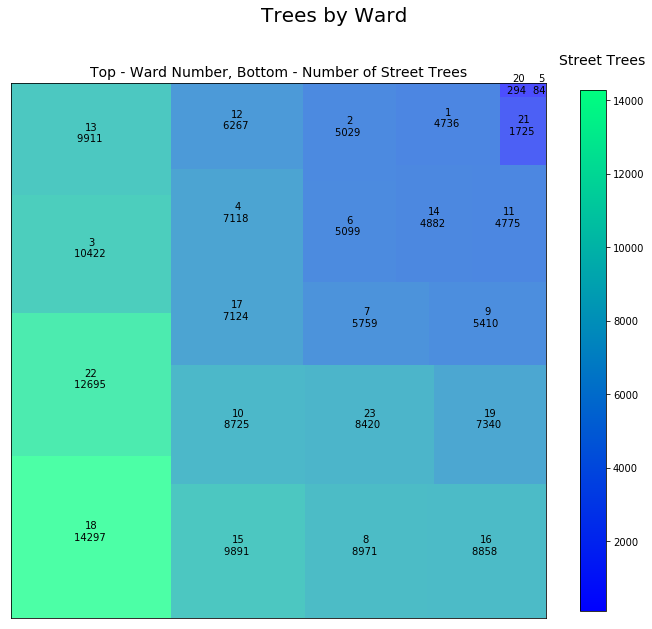

In [53]:
# code template borrowed from - https://gist.github.com/gVallverdu/0b446d0061a785c808dbe79262a37eea
# treemap parameters
x = 0.
y = 0.
width = 100.
height = 100.


# color scale on the population
cmap = matplotlib.cm.winter
mini=min(nt_wards.num)
maxi=max(nt_wards.num)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in nt_wards.num]
 


# labels for squares
labels = ["%s\n%d \n" % (label) for label in zip(nt_wards.index, nt_wards.num)]


# make plot
fig = plt.figure(figsize=(12, 10))
fig.suptitle("Trees by Ward", fontsize=20)
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(nt_wards.num, color=colors, label=labels, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Top - Ward Number, Bottom - Number of Street Trees", fontsize=14)

# color bar
# create dummy invisible image with a color map
img = plt.imshow([nt_wards.num], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)

fig.text(.76, .9, "Street Trees", fontsize=14)


plt.show()

In [54]:
#make a map of the wards here

In [55]:
#check out the treatment of trees
df_tree.TREATMENT.value_counts()

None    155271
EAB       2413
DED2       116
DED1        32
Name: TREATMENT, dtype: int64

In [56]:
#difference between ward trees based on treatment vs not
df_treatment = df_tree.query('TREATMENT != "None"')
st_wards = df_treatment.WARD.value_counts()
pct_treat = (st_wards / s_wards) * 100
pct_treat.sort_values(ascending=False, inplace=True)

In [57]:
# create df containing percentage of trees treated, and number of trees
df_pct_treat = pct_treat.to_frame(name="pct")
df_ttl_byward = s_wards.to_frame(name="total")
df_pct_treat = df_pct_treat.join(df_ttl_byward)
df_pct_treat.reset_index(level=0, inplace=True)
df_pct_treat = df_pct_treat.rename(columns={'index': 'ward'})

In [58]:
#load ward types, to prepare for heatmap
df_ward = pd.read_csv("ward_types.csv")

In [59]:
df_pct_treat = df_pct_treat.join(df_ward['type'], on="ward")
df_pct_treat

,ward,pct,total,type
0,5,36.904762,84,Suburban
1,20,13.265306,294,Rural
2,21,9.043478,1725,Rural
3,8,4.068666,8971,Urban
4,23,4.049881,8420,NaN
5,4,3.470076,7118,Rural
6,7,3.438097,5759,Urban
7,1,3.040541,4736,Suburban
8,2,2.604892,5029,Suburban
9,16,2.020772,8858,Urban


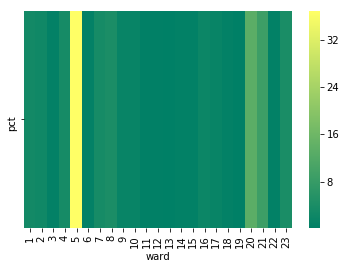

In [70]:
#heatmap of percentage of treated trees
pv_treat = df_pct_treat.pivot_table(values='pct',columns='ward')
sns.heatmap(pv_treat, cmap=matplotlib.cm.summer)

In [163]:
#check out roads data from expand dataset
df_tree_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162694 entries, 0 to 162693
Data columns (total 18 columns):
OBJECTID      162694 non-null object
WARD          162694 non-null object
ADDNUM        162694 non-null object
ADDSTR        162694 non-null object
LTLOCATION    160497 non-null object
RDLOCATION    82841 non-null object
FACILITY      162694 non-null object
EDGETREE      162694 non-null object
PATHRAIL      162694 non-null object
SPECIES       162694 non-null object
DBH           162694 non-null object
ARTROAD       162694 non-null object
TREATMENT     162694 non-null object
STREET        162478 non-null object
EABTAGNUM     162694 non-null object
DEDTAGNUM     162694 non-null object
SAP_ID        162694 non-null object
STREET_EXP    124853 non-null object
dtypes: object(18)
memory usage: 22.3+ MB


In [162]:
top30_streets = df_tree_new.STREET_EXP.value_counts().nlargest(30)
top30_streets

ALTA VISTA DR           769
CARLING AVE             627
BANK ST                 524
HAZELDEAN RD            512
WELLINGTON ST           492
WOODROFFE AVE           363
PLEASANT PARK RD        363
SMYTH RD                334
MERIVALE RD             333
QUEEN ST                313
STITTSVILLE MAIN ST*    295
BROADWAY AVE            291
SOMERSET ST W           285
SOMERSET ST             285
CLEMOW AVE              267
BERRIGAN DR             262
KILBORN AVE             261
WELLINGTON ST W         261
HAIG DR                 253
CHAPMAN BLVD            245
BYRON AVE               242
PRESTON ST              242
CALAVERAS AVE           241
PLANTE DR               235
SHERWAY DR              233
CORONATION AVE          228
SOUTHMORE DR            225
LONGFIELDS DR           223
RICHMOND RD             222
BILLINGS AVE            222
Name: STREET_EXP, dtype: int64

In [165]:
#do the same, but with the dataset we inner joined
top30_streets2 = df_tree_new2.STREET_EXP.value_counts().nlargest(30)
top30_streets2

ALTA VISTA DR           769
CARLING AVE             627
BANK ST                 524
HAZELDEAN RD            512
WELLINGTON ST           492
PLEASANT PARK RD        363
WOODROFFE AVE           363
SMYTH RD                334
MERIVALE RD             333
QUEEN ST                313
STITTSVILLE MAIN ST*    295
BROADWAY AVE            291
SOMERSET ST W           285
SOMERSET ST             285
CLEMOW AVE              267
BERRIGAN DR             262
KILBORN AVE             261
WELLINGTON ST W         261
HAIG DR                 253
CHAPMAN BLVD            245
PRESTON ST              242
BYRON AVE               242
CALAVERAS AVE           241
PLANTE DR               235
SHERWAY DR              233
CORONATION AVE          228
SOUTHMORE DR            225
LONGFIELDS DR           223
BILLINGS AVE            222
RICHMOND RD             222
Name: STREET_EXP, dtype: int64

In [94]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157832 entries, 0 to 157831
Data columns (total 17 columns):
OBJECTID        157832 non-null int64
WARD            157832 non-null int64
ADDNUM          157832 non-null object
ADDSTR          157832 non-null object
LTLOCATION      155674 non-null object
RDLOCATION      79005 non-null object
FACILITY        157832 non-null object
EDGETREE        157832 non-null object
PATHTRAIL       157832 non-null object
SPECIES         157832 non-null object
DBH             157832 non-null object
ARTROAD         157832 non-null object
TREATMENT       157832 non-null object
STREET          157616 non-null object
EABTAGNUMBER    157832 non-null object
DEDTAGNUMBER    157832 non-null object
SAP_ID          157832 non-null object
dtypes: int64(2), object(15)
memory usage: 20.5+ MB


In [108]:
#remove None from DBH and WARD
df_dbh = df_tree.loc[df_tree['DBH'] != "None"]
#box trees into 3 categories - contains Ash in name, contains Elm in name, all other
def tree_name (row):
    if row['SPECIES'].find(" Ash ") > -1:
        return 'Ash'
    if row['SPECIES'].find("Elm") > -1:
        return 'Elm'
    return 'Other'

In [109]:
df_dbh['treat_spec'] = df_dbh.apply(lambda row: tree_name (row),axis=1)
df_dbh

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,OBJECTID,WARD,ADDNUM,ADDSTR,LTLOCATION,RDLOCATION,FACILITY,EDGETREE,PATHTRAIL,SPECIES,DBH,ARTROAD,TREATMENT,STREET,EABTAGNUMBER,DEDTAGNUMBER,SAP_ID,treat_spec
0,1,12,45,3996,Front,NaN,0,0,0,Crabapple Species,50,0,None,None,None,None,None,Other
1,2,12,62,3996,Front,NaN,0,0,0,Ash White,19,0,None,None,None,None,None,Other
2,3,12,68,3996,Front,NaN,0,0,0,Ash White,16,0,None,None,None,None,None,Other
3,4,12,32,3996,Front,NaN,0,0,0,Ginkgo,8,0,None,None,None,None,None,Other
4,5,12,20,3996,Front,NaN,0,0,0,Locust Honey,33,0,None,None,None,None,None,Other
5,6,12,20,3996,Front,NaN,0,0,0,Locust Honey,27,0,None,None,None,None,None,Other
6,7,12,13,3996,Front,NaN,0,0,0,Cherry Choke Schubert,15,0,None,None,None,None,None,Other
7,8,12,292,3940,Side,NaN,0,0,0,Oak Red,39,0,None,None,None,None,None,Other
8,9,12,801,3931,Side,NaN,0,0,0,Locust Honey,30,0,None,None,None,None,None,Other
9,10,12,503,3931,Side,NaN,0,0,0,Maple Norway,23,0,None,None,None,None,None,Other


(0, 110)

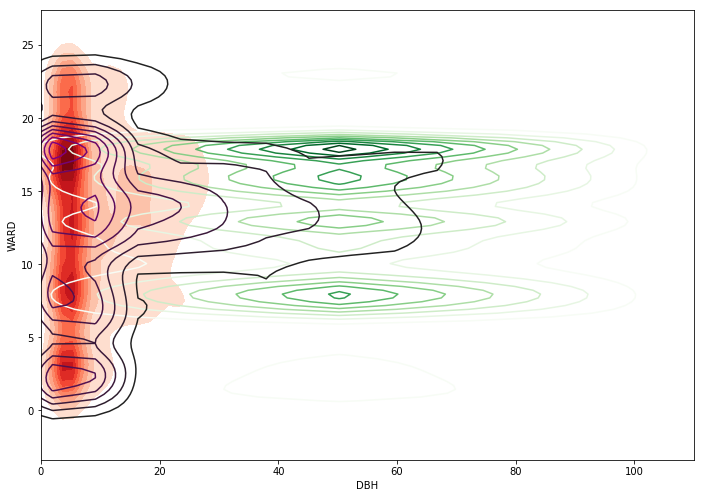

In [142]:
#looking at diameter
ash = df_dbh.loc[df_dbh.treat_spec == "Ash"]
elm = df_dbh.loc[df_dbh.treat_spec == "Elm"]
other = df_dbh.loc[df_dbh.treat_spec == "Other"]

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

pcmap = sns.dark_palette("purple", as_cmap=True)

ax = sns.kdeplot(other.DBH, other.WARD, cmap="Greens", n_levels=10, shade=False, shade_lowest=False)
ax = sns.kdeplot(ash.DBH, ash.WARD, cmap="Reds", n_levels=10, shade=True, shade_lowest=False)
ax = sns.kdeplot(elm.DBH, elm.WARD, cmap=pcmap, n_levels=10, shade=False, shade_lowest=False)


plt.xlim(0,110)


#ax = sns.kdeplot(df_dbh.DBH, df_dbh.WARD, cmap="Greens", shade=True, shade_lowest=False)

In [133]:
pd.factorize(df_dbh['DBH'])[0]
df_dbh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157620 entries, 0 to 157831
Data columns (total 18 columns):
OBJECTID        157620 non-null int64
WARD            157620 non-null int64
ADDNUM          157620 non-null object
ADDSTR          157620 non-null object
LTLOCATION      155547 non-null object
RDLOCATION      78977 non-null object
FACILITY        157620 non-null object
EDGETREE        157620 non-null object
PATHTRAIL       157620 non-null object
SPECIES         157620 non-null object
DBH             157620 non-null object
ARTROAD         157620 non-null object
TREATMENT       157620 non-null object
STREET          157404 non-null object
EABTAGNUMBER    157620 non-null object
DEDTAGNUMBER    157620 non-null object
SAP_ID          157620 non-null object
treat_spec      157620 non-null object
dtypes: int64(2), object(16)
memory usage: 27.8+ MB


TypeError: cannot perform reduce with flexible type

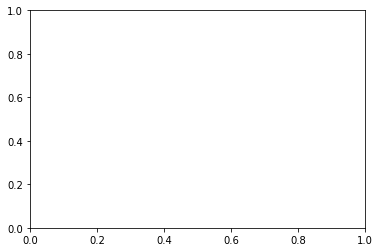

In [131]:
#sns.violinplot(x="DBH", y="treat_spec", data=df_dbh, palette='rainbow')
#sns.stripplot(x="DBH", y="WARD", hue="treat_spec", data=df_dbh, jitter=True)
#sns.swarmplot(x="DBH", y="WARD",  hue="treat_spec", data=df_dbh)
sns.boxplot(data=df_dbh, x="DBH", y="treat_spec", palette='rainbow',orient='h')

TypeError: can't multiply sequence by non-int of type 'float'

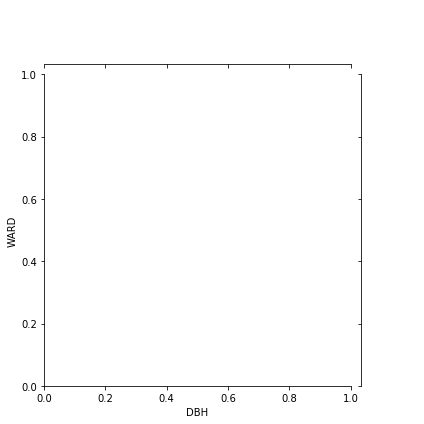

In [132]:
sns.jointplot(x='DBH',y='WARD',data=df_dbh,kind='hex', hue="treat_spec")